In [65]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import time 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.model_selection import KFold
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

## All Data

In [66]:
#train_all = pd.read_csv('train0_one5th.csv')
#train_all = pd.read_csv('train5050.csv')
#train_all = pd.read_csv('train1040.csv')
train_all = pd.read_csv('train100900.csv')
#train_all = pd.read_csv('train005995.csv')
test_data = pd.read_csv('test_full.csv')
val_all = pd.read_csv('val_full.csv')

In [67]:
#train_all = train_all.drop(train_all.columns[[0,1]],axis =1)
train_all= train_all.drop(['region','city','counts_r','counts_c','Unnamed: 0','index'],axis =1)
train_all.head(5)

,click,weekday,hour,adexchange,slotwidth,slotheight,slotprice,advertiser,usertag_0,usertag_10052,...,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld,bidprice,payprice,freq_c,freq_r
0,0,3,21,2,300,250,5,3386,0,0,...,0,0,0,0,0,0,300,14,0.001344,0.033467
1,0,5,1,1,950,90,0,3427,1,0,...,0,0,0,0,0,0,227,74,0.001258,0.029835
2,0,5,7,3,1000,90,70,3476,0,0,...,0,0,0,0,0,0,254,73,0.001286,0.044469
3,0,1,1,2,728,90,52,2821,1,0,...,0,0,0,0,0,0,277,52,0.001983,0.044469
4,0,2,17,1,300,250,0,3386,1,0,...,0,0,0,1,0,0,300,47,0.001750,0.012885


In [68]:
#test_data = test_data.drop(test_data.columns[[0]],axis =1)
test_data= test_data.drop(['region','city','counts_r','counts_c','Unnamed: 0'],axis =1)
test_data.head(5)

,weekday,hour,adexchange,slotwidth,slotheight,slotprice,advertiser,usertag_10024,usertag_10077,usertag_10075,...,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld,freq_c,freq_r
0,0,12,3,300,250,10,3427,1,1,1,...,0,0,0,0,0,0,0,0,0.004638,0.065971
1,3,14,0,320,50,5,2997,0,0,0,...,0,0,0,0,0,1,0,0,0.041582,0.041582
2,5,19,1,336,280,0,1458,1,0,0,...,0,1,0,0,0,0,0,0,0.001335,0.012635
3,0,21,4,960,90,30,2821,0,0,1,...,0,1,0,0,0,0,0,0,0.000910,0.023984
4,2,20,3,300,250,50,3386,0,0,0,...,0,1,0,0,0,0,0,0,0.000722,0.012635


In [69]:
#val_all = val_all.drop(val_all.columns[[0,1]],axis =1)
val_all= val_all.drop(['region','city','counts_r','counts_c','Unnamed: 0','index'],axis =1)
val_all.head(5)

,weekday,hour,adexchange,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser,click,...,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld,freq_c,freq_r
0,4,20,1,160,600,0,300,23,1458,0,...,0,1,0,0,0,0,0,0,0.026276,0.026276
1,1,21,1,950,90,0,238,75,3476,0,...,0,0,0,0,0,0,0,0,0.026276,0.026276
2,4,8,2,300,250,5,238,65,3358,0,...,0,1,0,0,0,0,0,0,0.014994,0.014994
3,5,15,2,336,280,5,238,6,3358,0,...,0,0,0,0,0,0,0,0,0.002172,0.027197
4,1,18,2,200,200,5,249,5,3476,0,...,0,0,0,0,0,0,0,0,0.005459,0.019347


In [70]:
train_all_1 = train_all.reindex_axis(sorted(train_all.columns), axis=1)
#list(train_all_1)
train_all_1.shape

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


(717200, 103)

In [71]:
test_data_1 = test_data.reindex_axis(sorted(test_data.columns), axis=1)
#list(test_data_1)
test_data_1.shape

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


(303375, 100)

In [72]:
val_all_1 = val_all.reindex_axis(sorted(val_all.columns), axis=1)
#list(val_all_1)
val_all_1.shape

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


(303925, 103)

## Split data

In [73]:
#100 features
train_y_ctr = train_all_1['click']
train_y_wp = train_all_1['payprice']
train_x = train_all_1.drop(['click','payprice','bidprice'],axis =1)
test_y_ctr = val_all_1['click']
test_y_wp = val_all_1['payprice']
test_x = val_all_1.drop(['click','payprice','bidprice'],axis =1)

print(train_y_ctr.shape)
print(train_y_wp.shape)
print(train_x.shape)
print(test_y_ctr.shape)
print(test_y_wp.shape)
print(test_x.shape)

(717200,)
(717200,)
(717200, 100)
(303925,)
(303925,)
(303925, 100)


# Models

## Predict pCTR

In [74]:
#"MODEL 1 - Xgboost Classifier - clf_pCTR "

start = time.time()
clf = XGBClassifier(learning_rate= 0.1, max_depth= 5, 
                    n_estimators = 100,
                    gamma = 0,
                      min_child_weight =7,
                      colsample_bytree=0.6,
                      subsample=0.95, reg_alpha = 0.03)
clf_pCTR = clf.fit(train_x, train_y_ctr)
prediction1 = np.array(clf_pCTR.predict(test_x))
pCTR_m1 = clf_pCTR.predict_proba(test_x)  
end = time.time()

# AUC accuracy
fpr, tpr, thresholds = metrics.roc_curve(test_y_ctr, prediction1)
auc = metrics.auc(fpr, tpr)

score = accuracy_score(test_y_ctr, prediction1)

    
print("MODEL 1 - Xgboost Classifier - pCTR")
print("score =", score)
print("auc =", auc)
#print ("error_model_1 = ", 1-score)
print("Running time =", end - start)
print("pCTR: ")
print(pCTR_m1[:,1])


MODEL 1 - Xgboost Classifier - pCTR
score = 0.995255408407
auc = 0.695846769316
Running time = 191.05632424354553
pCTR: 
[ 0.01810302  0.013336    0.01698269 ...,  0.05522097  0.03828786
  0.04730557]


In [75]:
results_pCTR = pCTR_m1[:,1]
results_pCTR

array([ 0.01810302,  0.013336  ,  0.01698269, ...,  0.05522097,
        0.03828786,  0.04730557], dtype=float32)

In [76]:
r_pCTR=pd.DataFrame(data =results_pCTR, columns=['pCTR'])
r_pCTR.head(5)
#r.shape

,pCTR
0,0.018103
1,0.013336
2,0.016983
3,0.019592
4,0.009988


In [13]:
r_pCTR.to_csv('pCTR_xgboost.csv')

In [47]:
def gen_pCTR (df):
    pCTR_m1 = np.array(clf_pCTR.predict_proba(df))
    results_pCTR = pCTR_m1[:,1]
    r_pCTR=pd.DataFrame(data =results_pCTR, columns=['pCTR'])
    return r_pCTR

In [115]:
r_pCTR = gen_pCTR (val_test)

In [171]:
r_pCTR = gen_pCTR (test_data_1)

,pCTR
0,0.101232
1,0.323774
2,0.022959
3,0.123400
4,0.059699
5,0.050582
6,0.035995
7,0.086464
8,0.076653
9,0.078304


## Predict pWP

In [77]:
#"MODEL 2 - XGBRegressor() - clf2_pWP"

# Train and Predict
start = time.time()
#clf2_pWP = XGBClassifier()
clf2_pWP = XGBRegressor()
clf2_pWP.fit(train_x, train_y_wp)
prediction2_wp = np.array(clf2_pWP.predict(test_x))
pWP_m6 = clf.predict_proba(test_x)  
end = time.time()

print("MODEL 2 - LR Classifier - clf2_pWP")
print("Running time =", end - start)
print("pWP: ")
print(prediction2_wp)

MODEL 2 - LR Classifier - clf2_pWP
Running time = 187.7286138534546
pWP: 
[  65.6975708    91.52745819   77.35237122 ...,  108.89304352   57.02135849
   59.96221542]


In [78]:
r_pWP = pd.DataFrame(data = prediction2_wp, columns=['pWP'])
r_pWP.head(5)

,pWP
0,65.697571
1,91.527458
2,77.352371
3,59.052113
4,57.523701


In [109]:
def gen_pWP (df):
    prediction2_wp = np.array(clf2_pWP.predict(df))
    r_pWP = pd.DataFrame(data = prediction2_wp, columns=['pWP'])
    return r_pWP

In [114]:
r_pWP = gen_pWP(val_test)

In [172]:
r_pWP = gen_pWP(test_data_1)

## Merge results

In [79]:
def comb (df, r_pCTR, r_pWP):
    data_comb = df.reset_index()
    data_comb = data_comb.drop(data_comb.columns[[0]], axis=1)
    print('test_comb: ', data_comb.shape)
    print('r_pCTR:', r_pCTR.shape)
    print('r_pWP:' ,r_pWP.shape)
    data_comb= pd.concat([data_comb, r_pWP], axis = 1)
    data_comb= pd.concat([data_comb, r_pCTR], axis = 1)
    print('new test_comb: ',data_comb.shape)
    return data_comb

In [80]:
val_comb = comb (val_all_1, r_pCTR, r_pWP)

test_comb:  (303925, 103)
r_pCTR: (303925, 1)
r_pWP: (303925, 1)
new test_comb:  (303925, 105)


## Calculate Rho

In [81]:
#test_comb['Rho']= test_comb['pCTR']/test_comb['pWP']
#test_comb.shape

val_comb['Rho']= val_comb['pCTR']/val_comb['pWP']
val_comb.shape

(303925, 106)

In [89]:
val_comb['Rho'] = val_comb['Rho'] * 1000
val_comb['Rho']

0         0.275551
1         0.145705
2         0.219550
3         0.331771
4         0.173629
5         0.610329
6         0.705285
7         0.764841
8         0.617507
9         0.356170
10        1.829982
11        0.379548
12        0.208755
13        1.602664
14        0.510285
15        0.237465
16        0.493289
17        0.209575
18        1.867324
19        0.369002
20        0.574550
21        0.746440
22        0.490968
23        0.166786
24        1.815439
25        0.800898
26        0.125406
27        0.781406
28        0.401294
29        1.428445
            ...   
303895    3.014953
303896    0.414558
303897    2.832720
303898    0.623070
303899    0.545842
303900    1.130764
303901    0.191185
303902    0.494110
303903    0.250683
303904    0.758241
303905    1.063100
303906    0.334735
303907    0.275273
303908    0.333839
303909    0.234174
303910    1.349804
303911    0.740364
303912    0.420640
303913    0.605636
303914    0.346549
303915    2.316627
303916    1.

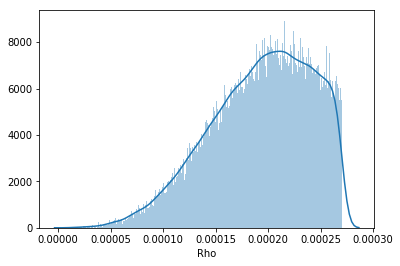

In [83]:
import seaborn as sns

q_75 = val_comb['Rho'].quantile(0.75)
q_25 = val_comb['Rho'].quantile(0.25)
less_25 = val_comb['Rho'][val_comb['Rho'] <= q_25]
sns.distplot(less_25, bins = 500)

#sns.distplot(val_comb['Rho'])
plt.show()

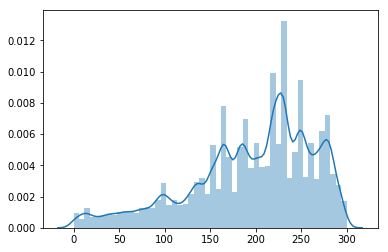

In [84]:
sns.distplot(val_comb['bidprice']-val_comb['payprice'])
plt.show()

## Function: check clicks

In [106]:
#B_curr=6250000

def test_clicks (df, E_Rho, B_curr, min_inc):
    i = 0
    c = 0
    s = 0
    b = 0
    while (B_curr > 0) and (i < len(df)):
        if (df['Rho'].iloc[i] < E_Rho): 
            i += 1
        elif (df['payprice'].iloc[i] > B_curr):
            i += 1
        elif (df['pWP'].iloc[i] < df['slotprice'].iloc[i]):
            i += 1
        elif ((df['pWP'].iloc[i] + min_inc) < df['bidprice'].iloc[i]):
            i += 1  
        else: 
            B_curr -= df['payprice'].iloc[i]
            c += df['click'].iloc[i]
            b += 1
            s += df['payprice'].iloc[i]
            i += 1
            #print(i, c, s, B_curr)
    return c, s, b

## Find optimal Rho

In [94]:
#test_comb_1=test_comb[test_comb['click']==1]
#test_comb_1.shape

val_comb_1=val_comb[val_comb['click']==1]
val_comb_1.shape

(202, 106)

In [95]:
Rho = val_comb['Rho']
Rho_avg = Rho.mean()
print('Rho_avg: ', Rho_avg)
Rho_med = Rho.median()
print('Rho_med: ',Rho_med)

Rho1 = val_comb_1['Rho']
Rho1_avg = Rho1.mean()
print('Rho1_avg: ',Rho1_avg)
Rho1_med = Rho1.median()
print('Rho1_med: ',Rho1_med)
Rho1_min = Rho1.min()
print('Rho1_min: ',Rho1_min)
Rho1_max = Rho1.max()
print('Rho1_max: ',Rho1_max)
Rho1_q25 = Rho1.quantile(0.25)
print('Rho1_q25: ',Rho1_q25)

Rho_avg:  0.7293069958686829
Rho_med:  0.47073841094970703
Rho1_avg:  5.463656425476074
Rho1_med:  3.305744171142578
Rho1_min:  0.213741
Rho1_max:  23.8784
Rho1_q25:  1.12327441573143


In [111]:
df = val_comb

#j = 0
clicks =[]
spends=[]
bids = []
J=[]
j=0.4

while j < 1.2: 
    c, s, b = test_clicks(df, j, 6250000,262)
    clicks = np.append(clicks,c)
    spends = np.append(spends,s)
    bids = np.append(spends,b)
    J = np.append(J,j)
    j +=0.1

print(clicks, spends, bids)

[  89.  109.  135.  160.  167.  162.  156.  152.] [ 6250000.  6250000.  6250000.  6250000.  5259356.  4313450.  3571154.
  2984816.] [ 6250000.  6250000.  6250000.  6250000.  5259356.  4313450.  3571154.
  2984816.    42310.]


In [112]:
df_C = pd.DataFrame(data =clicks,columns=['Clicks'] )
df_J = pd.DataFrame(data =J,columns=['Rho_threshold'] )
df_T = pd.concat([df_J,df_C],axis = 1)
df_T.head(5)

,Rho_threshold,Clicks
0,0.4,89.0
1,0.5,109.0
2,0.6,135.0
3,0.7,160.0
4,0.8,167.0


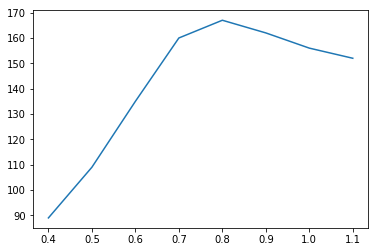

In [113]:
plt.plot(df_T ['Rho_threshold'],  df_T ['Clicks']) 
plt.show()

In [100]:
Rho_min = np.argmax(df_T ['Clicks'])*0.1+0.2
Rho_min 

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


0.7

## Find optimal bidding increment 

In [123]:
#j = 0
clicks =[]
spends=[]
bids=[]
M=[]
m=240

while m <= 280: 
    c, s, b = test_clicks(val_comb, 0.7, 6250000,m)
    clicks = np.append(clicks,c)
    spends = np.append(spends,s)
    bids = np.append(spends,b)
    M = np.append(M,m)
    m +=1

print(clicks, spends, bids)

[ 161.  161.  162.  163.  163.  164.  164.  164.  164.  164.  164.  165.
  164.  164.  164.  164.  163.  163.  163.  164.  164.  162.  160.  157.
  156.  156.  156.  156.  156.  156.  156.  156.  156.  156.  156.  156.
  156.  156.  156.  156.  156.] [ 5940425.  5975684.  6003038.  6048688.  6096005.  6140328.  6162656.
  6185464.  6205602.  6225495.  6249988.  6250000.  6250000.  6250000.
  6250000.  6250000.  6250000.  6250000.  6250000.  6250000.  6250000.
  6250000.  6250000.  6250000.  6250000.  6250000.  6250000.  6250000.
  6250000.  6250000.  6250000.  6250000.  6250000.  6250000.  6250000.
  6250000.  6250000.  6250000.  6250000.  6250000.  6250000.] [ 5940425.  5975684.  6003038.  6048688.  6096005.  6140328.  6162656.
  6185464.  6205602.  6225495.  6249988.  6250000.  6250000.  6250000.
  6250000.  6250000.  6250000.  6250000.  6250000.  6250000.  6250000.
  6250000.  6250000.  6250000.  6250000.  6250000.  6250000.  6250000.
  6250000.  6250000.  6250000.  6250000.  625000

In [120]:
df_C = pd.DataFrame(data =clicks,columns=['Clicks'] )
df_M = pd.DataFrame(data =M,columns=['Min_increment'] )
df_T = pd.concat([df_M,df_C],axis = 1)
df_T.head(5)

,Min_increment,Clicks
0,240.0,157.0
1,241.0,157.0
2,242.0,157.0
3,243.0,158.0
4,244.0,158.0


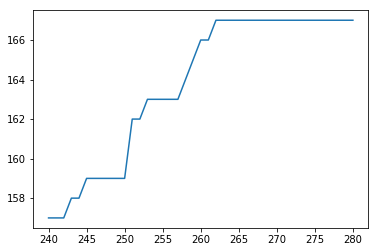

In [121]:
plt.plot(df_T ['Min_increment'],  df_T ['Clicks']) 
plt.show()

In [122]:
Inc_max = np.argmax(df_T ['Clicks'])+240
Inc_max 

/Users/jennyyang/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


262

In [101]:
test_clicks(val_comb, 0.7, 6250000,250)

(164, 6249988)

## Final Bidding 

In [178]:
def bid (df, E_Rho, B_curr, min_inc):
    df['bid']=''
    i = 0
    c = 0
    s = 0
    while (B_curr > 0) and (i < len(df)):
        if (df['Rho'].iloc[i] < E_Rho): 
            df['bid'].iloc[i] = 0
            i += 1
        elif (df['pWP'].iloc[i] > B_curr):
            df['bid'].iloc[i] = 0
            i += 1
        elif (df['pWP'].iloc[i] < df['slotprice'].iloc[i]):
            df['bid'].iloc[i] = 0
            i += 1
        else: 
            df['bid'].iloc[i] = df['pWP'].iloc[i]+ min_inc
            c += 1
            s += df['pWP'].iloc[i]
            i += 1
            #print(i, c, s, B_curr)
    return c, s